In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls 

StoreItemDemandPred.ipynb  store-item-forcasting.ipynb	test.csv  train.csv


In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
print("The shape of train set is {} and the shape of test set is {}".format(df_train.shape, df_test.shape))

The shape of train set is (913000, 4) and the shape of test set is (45000, 4)


## Distribution of Sales

In [12]:
def sales_dist(data):
    sales_df = data.copy(deep=True)
    sales_df['sales_bins'] = pd.cut(sales_df.sales, [0, 50, 100, 150, 200, 250])
    print("Max sale:", sales_df.sales.max())
    print("Min sale", sales_df.sales.min())
    print("Avg sale", sales_df.sales.mean())
    print()
    return sales_df

sales_df = sales_dist(df_train)

total_points = pd.value_counts(sales_df.sales_bins).sum()
print("Sales bucket v/s Total percentage:")
display(pd.value_counts(sales_df.sales_bins).apply(lambda s: (s/total_points) * 100))

Max sale: 231
Min sale 0
Avg sale 52.250286966046005

Sales bucket v/s Total percentage:


(0, 50]       54.591407
(50, 100]     38.388322
(100, 150]     6.709974
(150, 200]     0.308544
(200, 250]     0.001752
Name: sales_bins, dtype: float64

In [22]:
import seaborn as sns

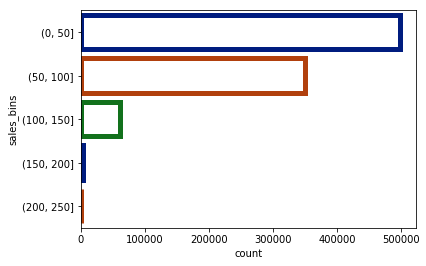

In [60]:
sales_count = pd.value_counts(sales_df.sales_bins)
# sales_count.sort_values(ascending=True).plot(kind='barh', title="Sales distribution", )
sns.countplot(y = sales_df.sales_bins, facecolor=(1, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

In [65]:
from scipy.stats import norm

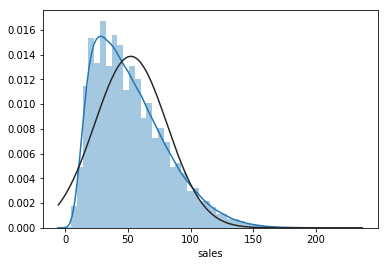

In [66]:
sns.distplot(df_train.sales, fit=norm)

## Let us understand the sales data distribution across the stores

In [70]:
from matplotlib import pyplot as plt

sales                                                         \
item          1          2          3          4          5          6    
store                                                                     
1      19.971522  53.148959  33.208105  19.956188  16.612815  53.060789   
2      28.173604  75.316539  46.992333  28.234940  23.540526  74.945235   
3      25.070099  66.804491  41.771084  25.116101  20.857612  67.007119   
4      22.938664  61.715225  38.548193  23.086528  19.525192  61.270537   
5      16.739321  44.488499  27.835706  16.776561  14.086528  44.564622   
6      16.717963  44.533954  27.811062  16.754107  13.893209  44.503834   
7      15.159365  40.717963  25.531216  15.358160  12.733844  40.703724   
8      26.983571  71.656627  45.076123  26.948521  22.427711  71.958379   
9      23.325849  61.792442  38.535049  23.150055  19.272180  61.412377   
10     24.736035  65.566813  41.113363  24.721249  20.637459  65.612267   

                                                     ...                 \
item          7          8          9          10    ...             41   
store                                                ...                  
1      52.783680  69.472070  46.504929  66.354326    ...      20.002738   
2      75.058598  99.090361  65.478094  94.097481    ...      28.069551   
3      66.647864  87.517525  58.486857  83.387733    ...      24.989047   
4      61.625411  80.819825  54.043812  77.047645    ...      23.168127   
5      44.535597  58.565717  38.837349  55.509858    ...      16.830778   
6      44.599124  58.385542  39.460022  55.565170    ...      16.607338   
7      40.709748  53.723987  35.901972  51.156627    ...      15.471522   
8      71.730559  94.461117  63.193319  89.818182    ...      27.036145   
9      61.812158  81.287514  54.105696  77.105148    ...      23.191128   
10     65.807777  86.176889  57.886637  82.232202    ...      24.654984   

                                                                          \
item          42         43         44          45         46         47   
store                                                                      
1      33.105696  46.242607  26.594195   72.720701  52.845016  19.814348   
2      47.368018  65.785323  37.785871  103.381161  75.219606  28.187842   
3      41.797371  58.197700  33.386090   91.851041  66.748083  25.120482   
4      38.539978  54.018620  30.952355   84.687295  61.420044  23.114458   
5      27.730559  39.163198  22.415115   61.427163  44.734940  16.699343   
6      27.893209  39.034502  22.322563   61.142935  44.539978  16.708653   
7      25.435926  35.426068  20.446331   55.905805  40.828587  15.479189   
8      45.144031  62.980285  36.194414   98.941402  72.004929  27.150055   
9      38.643483  54.152793  30.968237   85.093647  62.010953  23.003286   
10     41.222892  57.942497  32.916758   90.690581  66.046550  24.755750   

                                        
item          48         49         50  
store                                   
1      46.546002  26.461665  59.342826  
2      66.028478  37.711939  84.622125  
3      58.700986  33.259584  74.958379  
4      53.765608  30.840635  68.921687  
5      39.281490  22.371851  50.319277  
6      39.052574  22.181271  50.516429  
7      35.624315  20.406353  45.823658  
8      62.737130  36.035049  80.972070  
9      53.976999  31.052574  69.308324  
10     57.814896  33.032311  74.037240  

[10 rows x 50 columns]

<Figure size 1440x720 with 0 Axes>

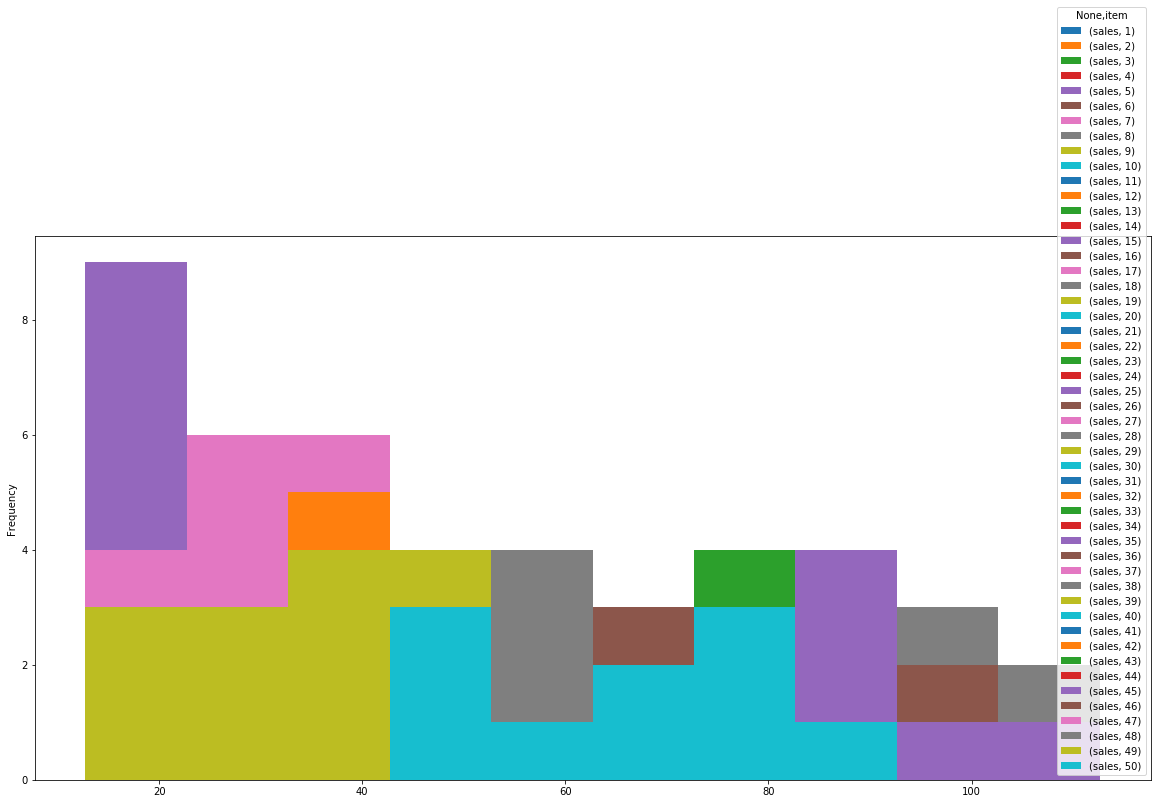

In [72]:
def sales_data_understanding(data):
    store_df = data.copy()
    plt.figure(figsize=(20, 10))
    sales_pivoted_df = pd.pivot_table(store_df, index='store', values=['sales', 'date'],
                                      columns='item', aggfunc=np.mean)
    sales_pivoted_df.plot(kind='hist', figsize=(20, 10))
    display(sales_pivoted_df)
    return (store_df, sales_pivoted_df)

store_df, sales_pivoted_df = sales_data_understanding(df_train)

## Let's use this dataframe and produce some interesting visualizations

In [94]:
sales_across_store_df = sales_pivoted_df.copy()
sales_across_store_df['avg_sale'] = sales_across_store_df.apply(lambda row: row.mean(), axis=1)

In [98]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [105]:
sales_store_data = go.Scatter(
    y = sales_across_store_df.avg_sale.values,
    mode = 'markers',
    marker = dict(
        size = sales_across_store_df.avg_sale.values,
        color = sales_across_store_df.avg_sale.values,
        colorscale = 'Viridis',
        showscale=True
    ),
    text = sales_across_store_df.index.values
)
data = [sales_store_data]

sales_store_layout = go.Layout(
    autosize = True,
    title = 'Scatter plot of avg sales per store',
    hovermode = 'closest',
    xaxis = dict(
        title = 'Stores',
        ticklen = 10,
        zeroline = False,
        gridwidth = 1,
    ),
    yaxis = dict(
        title = 'Avg Sales',
        ticklen = 10,
        zeroline = False,
        gridwidth = 1,
    ),
    showlegend = False
)

fig = go.Figure(data = data, layout=sales_store_layout)
py.iplot(fig, filename = 'sactter_sales_store')